<a href="https://colab.research.google.com/github/msuriya2001/Csharp/blob/main/particle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, fitness, dim, minx, maxx, seed):
        np.random.seed(seed)

        # initialize position and velocity of the particle with random values
        self.pos = np.random.uniform(minx,maxx,dim)
        self.vel = np.random.uniform(minx,maxx,dim)
        
        # compute fitness of particle
        self.fitness = fitness(self.pos) # curr fitness
        
        # initialize best position and fitness of this particle
        self.best_pos = np.copy(self.pos)
        self.best_fitness = self.fitness # best fitness

def pso(fitness, max_iter, n, dim, minx, maxx, w, c1, c2):
    
    # create n random particles
    swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]

    # compute the value of best_position and best_fitness in swarm
    best_particle = min(swarm,key=lambda x: x.fitness)
    swarm_best_pos = np.copy(best_particle.pos)
    swarm_best_fitness  = best_particle.fitness

    # for tracking the best position
    swarm_best_pos_track = [swarm_best_pos]

    # main loop of pso
    for iter in range(max_iter):
        if iter % 10 == 0:
            print(f"{iter} > best fitness = {swarm_best_fitness:.4e} Best position: {swarm_best_pos}")

        for particle in swarm:
        
            # compute new velocity of curr particle
            r1,r2 = np.random.rand(2) # randomizations
            particle.vel = (
                (w * particle.vel) +
                (c1 * r1 * (particle.best_pos - particle.pos)) +
                (c2 * r2 * (swarm_best_pos - particle.pos))
            )
                                
            # if velocity is not in [minx, max] then clip it
            particle.vel = np.clip(particle.vel,minx,maxx)

            # compute new position using new velocity
            particle.pos += particle.vel

            # compute fitness of new position
            particle.fitness = fitness(particle.pos)

            # is new position a new best for the particle?
            if particle.fitness < particle.best_fitness:
                particle.best_fitness = particle.fitness
                particle.best_pos = np.copy(particle.pos)

            # is new position a new best overall?
            if particle.fitness < swarm_best_fitness:
                swarm_best_fitness = particle.fitness
                swarm_best_pos = np.copy(particle.pos)

                # adding the best postion
                swarm_best_pos_track.append(swarm_best_pos)
    
    print("\nBest solution found:")
    print(swarm_best_pos)
    print(f"fitness of best solution = {swarm_best_fitness:.4e}")

    return swarm_best_pos, swarm_best_pos_track

In [2]:
def plot_optimization(fitness,minx,maxx,best_pos_track):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=25,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

In [3]:
np.set_printoptions(precision=6,suppress=True)        

# hyper parameters and setup
w = 0.75 # inertia
c1 = 1.5 # cognitive (particle)
c2 = 1.5 # social (swarm)

dim = 2
num_particles = 50
max_iter = 100
minx, maxx = -10.0, 10.0

In [4]:


def fitness_rastrigin(x):
    x = np.array(x)
    return 10*x.shape[0] + np.sum(x**2 - 10 * np.cos(2*np.pi*x))

best_position,best_pos_track = pso(fitness_rastrigin, max_iter, num_particles, dim,minx ,maxx, w,c1,c2)



0 > best fitness = 1.1326e+01 Best position: [3.007485 0.109067]
10 > best fitness = 2.1903e+00 Best position: [1.027268 0.071181]
20 > best fitness = 1.0005e+00 Best position: [ 0.994677 -0.0053  ]
30 > best fitness = 1.0005e+00 Best position: [ 0.994677 -0.0053  ]
40 > best fitness = 9.9715e-01 Best position: [ 0.996548 -0.002922]
50 > best fitness = 9.9509e-01 Best position: [ 0.994535 -0.000698]
60 > best fitness = 9.9501e-01 Best position: [ 0.994816 -0.000479]
70 > best fitness = 7.9352e-02 Best position: [0.015732 0.012359]
80 > best fitness = 8.5186e-03 Best position: [0.0023   0.006136]
90 > best fitness = 2.8513e-04 Best position: [-0.000119 -0.001193]

Best solution found:
[-0.000111 -0.000145]
fitness of best solution = 6.6377e-06


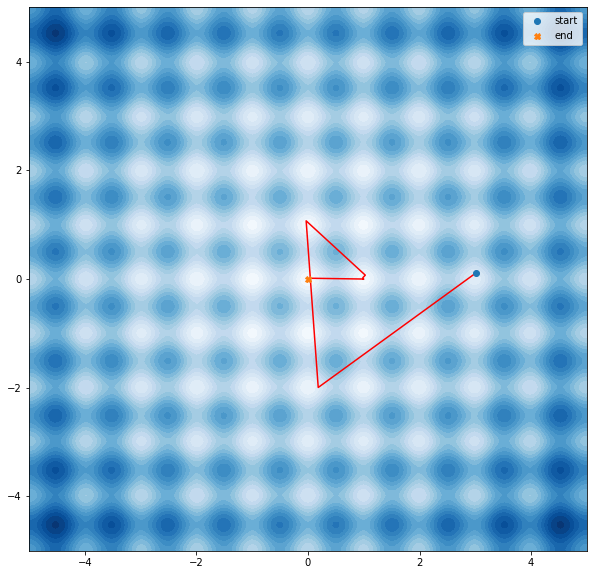

In [5]:
plot_optimization(fitness_rastrigin,-5,5,best_pos_track)

In [6]:


def fitness_sphere(x):
    x = np.array(x)
    return np.sum(x**2)

best_position, best_pos_track = pso(fitness_sphere, max_iter, num_particles, dim, -10.0, 10.0, w,c1,c2)



0 > best fitness = 9.0569e+00 Best position: [3.007485 0.109067]
10 > best fitness = 1.2294e-02 Best position: [ 0.034144 -0.105491]
20 > best fitness = 1.3822e-04 Best position: [0.000694 0.011736]
30 > best fitness = 3.0985e-05 Best position: [0.001837 0.005255]
40 > best fitness = 3.6264e-06 Best position: [-0.000974 -0.001636]
50 > best fitness = 8.4792e-08 Best position: [-0.00019  0.00022]
60 > best fitness = 6.9698e-08 Best position: [-0.000141  0.000223]
70 > best fitness = 1.8090e-09 Best position: [0.000017 0.000039]
80 > best fitness = 2.8755e-10 Best position: [-0.000002 -0.000017]
90 > best fitness = 7.9526e-12 Best position: [0.000001 0.000003]

Best solution found:
[0.000001 0.000002]
fitness of best solution = 3.9703e-12


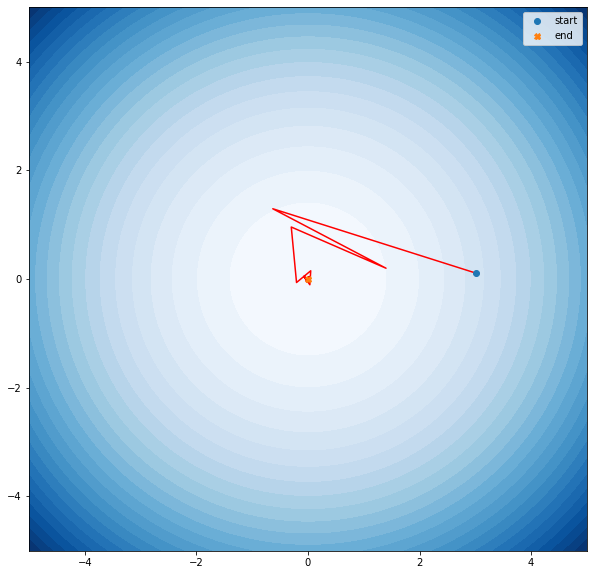

In [7]:
plot_optimization(fitness_sphere,-5,5,best_pos_track)